# Background

**Dataset:** provided: a time-series dataset, sourced from Kaggle, displaying the price of BTC in USDT from 2017-2022.

**Objective:** create an auto-regression model in order to predict the price of BTC daily or monthly.

**Questions:** 
1. Does the size of the train dataset affect the mean absolute error (MAE)?
2. Will the average price of BTC decrease or increase in the next 3 months?
3. What do the seasonal trend in the price flucuation look like?
4. What is the expected return on investment if the algorithm is used in practice?

**Future analysis:**
1. What other factors affects the price of BTC?


**Summary**

To predict the market price and stability of Bitcoin in Crypto-market, a machine learning based time series analysis has been applied. Time-series analysis can predict the rise and falls in the price of Bitcoin. For this purpose we have used ARIMA for time series analysis as a machine learning technique. The parameters on the basis of which we have evaluated these models a is Mean Squared Error (MSE). 

<!-- If I was to use my algoritm in a trading investment,

If I was to use your algorithm, and make a decision to buy BTC, what is going to be my original investment if I was to sell the next day.

Is the row time series enough to produce buy and sell decisions -->

# Methodology

### Understanding the data

> The data was extracted from Kaggle.

> The data spans over the period 2017 - 2022.

> There are 2 kinds of data: Prices (btc_crop) and a Complete Dataset (bitcoin)

### Features (full dataset)

>**Open Time/Close Time:** the time when the market opens and closes.

>**Open/close:** opening and closing price on the given day (USD).

>**High/Low:** highest and lowest price on the given day (USD).

>**Day of week:** 0 (Sunday), 1(Monday), 2(Tuesday), 3(Wednesday), 4(Thursday), 5(Friday), 6(Saturday)

>**Volume:** the sum total of actual trades taking place (quantity of asset bought or sold) displayed in USD.

>**Quote Asset Volume:** the volume in the second part of a pair (i.e. BTC/USDT - the quote would be volume in **USDT**)

>**Taker Buy (TB) base volume:** when buyers (takers) buy at the bid price set by sellers (makers), the amount of assets traded between the two contributes to the TB base volume.

> **Take Buy (TB) quote volume:** is expressed as the amount of coins that were paid by the buyer in BTC.

### Cleaning and pre-processing

1. **Cleaned the data -** converted the date to the datetime format, converted the rest of the columns into its correct data type, and checked for null values.

> We didn't find any null values or any errors in the data type.
> The whole dataset has 162583 entries and 23 columns


2. **Feature engineering**

    **a.** Labeled the 'Open Time' according to the US holiday calendar ('Weekend', 'Workday', 'Holiday').
    
    **b.** Created a function to label time intervals in 'Open Time' to assign the description of the day time ('Morning',                'Afternoon', 'Evening', 'Late Night').

### Exploratory data analysis (EDA)

1. Filtered the data to only show the columns related to time and price (bc_crop)
2. Calculated the average price per 15 min interval using the 'high' and 'low' columns
3. Grouped the filtered data by date and calculated the mean of the average price per 15 min interval per day
4. Created a boxplot with the training data, which has a size of a month, and the full dataset, size of 5 years, to discover seasonality

**Findings:**
- There was no seasonality or trends in both the training data and the full dataset.



# Analysis

#### Steps taken for analysis:
1. 

#### Results:
1. 

# Import packages

In [ ]:
!pip install statsmodels==0.12.1
!pip install pmdarima

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf

     |████████████████████████████████| 9.5 MB 10.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 1.4 MB 6.0 MB/s 


# Read BTCUSDT csv file

In [ ]:
url = 'https://raw.githubusercontent.com/iruxandra/BTC/main/BTCUSDT.csv'

In [ ]:
bitcoin = pd.read_csv(url)

In [ ]:
bitcoin.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2017-08-17 04:00:00.000000000,4261.48,4280.56,4261.48,4261.48,2.189061,2017-08-17 04:14:59.999000064,9333.620962,9,0.489061,2089.104962,7958.417415
1,2017-08-17 04:15:00.000000000,4261.48,4270.41,4261.32,4261.45,9.119865,2017-08-17 04:29:59.999000064,38891.133046,40,3.447113,14703.934995,7922.579933
2,2017-08-17 04:30:00.000000000,4280.00,4310.07,4267.99,4310.07,21.923552,2017-08-17 04:44:59.999000064,94080.917568,58,20.421317,87620.977876,7912.494217
3,2017-08-17 04:45:00.000000000,4310.07,4313.62,4291.37,4308.83,13.948531,2017-08-17 04:59:59.999000064,60060.466816,64,10.803012,46538.460109,7887.635513
4,2017-08-17 05:00:00.000000000,4308.83,4328.69,4304.31,4304.31,5.101153,2017-08-17 05:14:59.999000064,22006.533111,44,3.496635,15093.783057,7865.654419


# Convert 'Open Time' and 'Close Time' to datetime

In [ ]:
bitcoin=bitcoin.sort_values('Open Time')
bitcoin['Open Time']=pd.to_datetime(bitcoin['Open Time'])
bitcoin['Close Time']=pd.to_datetime(bitcoin['Close Time'])

#### Resetting index with 'Open Time' & refining the grain of the data

In [ ]:
bitcoin.set_index('Open Time',inplace=True)

In [ ]:
bitcoin['year']=bitcoin.index.year.astype(int)
bitcoin['month']=bitcoin.index.month.astype(int) 
bitcoin['day_of_year']=bitcoin.index.dayofyear.astype(int)
bitcoin['day_name']=bitcoin.index.day_name()
bitcoin['day_of_week']=bitcoin.index.dayofweek.astype(int)
bitcoin['day_of_month']=bitcoin.index.days_in_month.astype(int)
bitcoin['quarter']=bitcoin.index.quarter.astype(int)
bitcoin['hour']=bitcoin.index.hour.astype(int)
bitcoin['minute']=bitcoin.index.minute.astype(int)
bitcoin['date']=bitcoin.index.date
bitcoin.head()

,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,...,year,month,day_of_year,day_name,day_of_week,day_of_month,quarter,hour,minute,date
Open Time,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061,2017-08-17 04:14:59.999000064,9333.620962,9,0.489061,2089.104962,...,2017,8,229,Thursday,3,31,3,4,0,2017-08-17
2017-08-17 04:15:00,4261.48,4270.41,4261.32,4261.45,9.119865,2017-08-17 04:29:59.999000064,38891.133046,40,3.447113,14703.934995,...,2017,8,229,Thursday,3,31,3,4,15,2017-08-17
2017-08-17 04:30:00,4280.00,4310.07,4267.99,4310.07,21.923552,2017-08-17 04:44:59.999000064,94080.917568,58,20.421317,87620.977876,...,2017,8,229,Thursday,3,31,3,4,30,2017-08-17
2017-08-17 04:45:00,4310.07,4313.62,4291.37,4308.83,13.948531,2017-08-17 04:59:59.999000064,60060.466816,64,10.803012,46538.460109,...,2017,8,229,Thursday,3,31,3,4,45,2017-08-17
2017-08-17 05:00:00,4308.83,4328.69,4304.31,4304.31,5.101153,2017-08-17 05:14:59.999000064,22006.533111,44,3.496635,15093.783057,...,2017,8,229,Thursday,3,31,3,5,0,2017-08-17


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start='2017-08-17', end='2022-04-12')
bitcoin['holiday'] = bitcoin.index.isin(holidays)
bitcoin['week'] = bitcoin.index.dayofweek
bitcoin.loc[bitcoin['week'] >= 5, 'day_type'] = "weekend"
bitcoin.loc[bitcoin['week'] < 5, 'day_type'] = "workday"
bitcoin.loc[bitcoin['holiday'] == True, 'day_type'] = "holiday"
bitcoin = bitcoin.drop(['holiday', 'week'], axis=1)

In [ ]:
bitcoin.day_type.value_counts(dropna=False)

workday    115933
weekend     46602
holiday        48
Name: day_type, dtype: int64

In [ ]:
bitcoin.hour.value_counts()

23    6792
0     6788
20    6788
19    6788
18    6788
22    6787
12    6786
21    6785
11    6785
10    6784
1     6784
15    6784
17    6782
14    6782
13    6782
16    6780
9     6777
8     6765
5     6758
7     6756
6     6753
4     6743
3     6734
2     6732
Name: hour, dtype: int64

# Refining the grain of the data:
> Defining a function to label the time intervals throughout a day

In [ ]:
def time_slots(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late Night'



bitcoin['time_desc'] = bitcoin['hour'].apply(time_slots)

In [ ]:
bitcoin.time_desc.value_counts(dropna=False)

Late Night    54118
Morning       40620
Evening       33931
Afternoon     33914
Name: time_desc, dtype: int64

In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162583 entries, 2017-08-17 04:00:00 to 2022-04-12 12:45:00
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Open                162583 non-null  float64       
 1   High                162583 non-null  float64       
 2   Low                 162583 non-null  float64       
 3   Close               162583 non-null  float64       
 4   Volume              162583 non-null  float64       
 5   Close Time          162583 non-null  datetime64[ns]
 6   Quote Asset Volume  162583 non-null  float64       
 7   Number of Trades    162583 non-null  int64         
 8   TB Base Volume      162583 non-null  float64       
 9   TB Quote Volume     162583 non-null  float64       
 10  Ignore              162583 non-null  float64       
 11  year                162583 non-null  int64         
 12  month               162583 non-null  int64         


In [ ]:
bitcoin.Open.value_counts()

3950.00     18
6500.00     16
3900.00     15
3910.00     14
4300.00     14
            ..
8527.97      1
8558.04      1
8564.90      1
8570.89      1
40529.98     1
Name: Open, Length: 147299, dtype: int64

#### Rough visualizations of the data

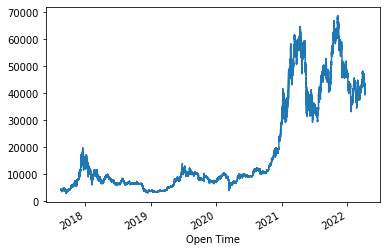

In [ ]:
bitcoin['Open'].plot()

# Filtering the data to show price in accordance to only time values

In [ ]:
bc_crop=bitcoin[['High','Low','year','month','day_of_year','day_name','day_of_week','day_of_month','quarter',
                'hour','minute','day_type','time_desc','date']]

In [ ]:
# Calculating the average price from the 'high' and 'low' columns
bc_crop['price']=(bc_crop['High']+bc_crop['Low'])/2.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
bc_crop.head()

,High,Low,year,month,day_of_year,day_name,day_of_week,day_of_month,quarter,hour,minute,day_type,time_desc,date,price
Open Time,,,,,,,,,,,,,,,
2017-08-17 04:00:00,4280.56,4261.48,2017,8,229,Thursday,3,31,3,4,0,workday,Late Night,2017-08-17,4271.020
2017-08-17 04:15:00,4270.41,4261.32,2017,8,229,Thursday,3,31,3,4,15,workday,Late Night,2017-08-17,4265.865
2017-08-17 04:30:00,4310.07,4267.99,2017,8,229,Thursday,3,31,3,4,30,workday,Late Night,2017-08-17,4289.030
2017-08-17 04:45:00,4313.62,4291.37,2017,8,229,Thursday,3,31,3,4,45,workday,Late Night,2017-08-17,4302.495
2017-08-17 05:00:00,4328.69,4304.31,2017,8,229,Thursday,3,31,3,5,0,workday,Late Night,2017-08-17,4316.500


In [ ]:
# Dropped the high and low columns as only the average price column is needed
bc_crop.drop(columns=['High','Low'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Grouped the data by date and aggregated with the mean of price

In [ ]:
bc=bc_crop[['date','price','day_of_week','day_of_month','quarter','day_type','year','month']].groupby(by='date').mean()

In [ ]:
bc.head()

,price,day_of_week,day_of_month,quarter,year,month
date,,,,,,
2017-08-17,4355.074188,3.0,31.0,3.0,2017.0,8.0
2017-08-18,4225.296771,4.0,31.0,3.0,2017.0,8.0
2017-08-19,4067.471198,5.0,31.0,3.0,2017.0,8.0
2017-08-20,4120.009740,6.0,31.0,3.0,2017.0,8.0
2017-08-21,4030.582865,0.0,31.0,3.0,2017.0,8.0


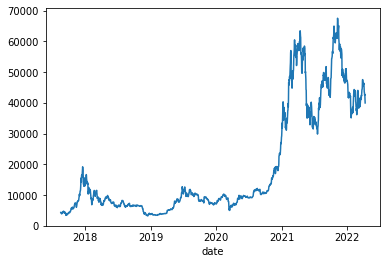

In [ ]:
bc['price'].plot()

In [ ]:
day30=bc.index[30]
bc.shape

(1700, 6)

In [ ]:
train=bc[:day30]

In [ ]:
train.shape

(31, 6)

In [ ]:
auto_arima(bc['price'][:int(len(bc)/2)],start_p=1,information_criterion='aic',trace=True,seasonal=True,m=25)

Performing stepwise search to minimize aic
 ARIMA(1,1,2)(1,0,1)[25] intercept   : AIC=inf, Time=18.43 sec
 ARIMA(0,1,0)(0,0,0)[25] intercept   : AIC=12358.741, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[25] intercept   : AIC=12331.609, Time=1.81 sec
 ARIMA(0,1,1)(0,0,1)[25] intercept   : AIC=12332.770, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[25]             : AIC=12356.818, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[25] intercept   : AIC=12330.013, Time=0.10 sec
 ARIMA(1,1,0)(0,0,1)[25] intercept   : AIC=12331.533, Time=1.86 sec
 ARIMA(1,1,0)(1,0,1)[25] intercept   : AIC=inf, Time=6.05 sec
 ARIMA(2,1,0)(0,0,0)[25] intercept   : AIC=12332.008, Time=0.63 sec
 ARIMA(1,1,1)(0,0,0)[25] intercept   : AIC=12332.015, Time=0.51 sec
 ARIMA(0,1,1)(0,0,0)[25] intercept   : AIC=12331.187, Time=0.76 sec
 ARIMA(2,1,1)(0,0,0)[25] intercept   : AIC=12334.017, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[25]             : AIC=12328.058, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[25]             : AIC=12329.650, Time=0.72 sec
 ARIMA(1,1,0)(0,

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 25),
      suppress_warnings=True, with_intercept=False)

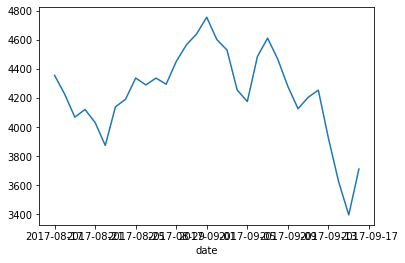

In [ ]:
train['price'].plot()

In [ ]:
train['date']=pd.to_datetime(train.index)
bc['date']=pd.to_datetime(bc.index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train['weekday']=train.date.dt.day_name()
bc['weekday']=bc.date.dt.day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


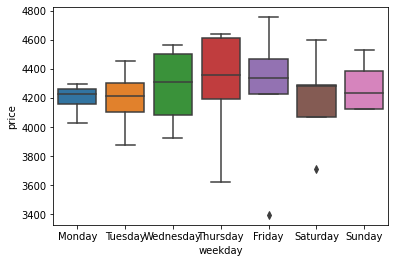

In [ ]:
sns.boxplot(data=train,x='weekday',y='price',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

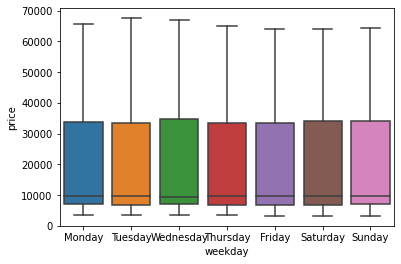

In [ ]:
sns.boxplot(data=bc,x='weekday',y='price',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [ ]:
bc['date']=pd.to_datetime(bc.index)

In [ ]:
bc['weekday']=bc.date.dt.day_name()

In [ ]:
bc['month']=bc.date.dt.month

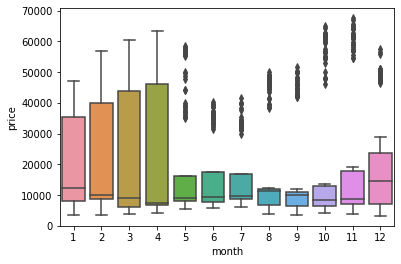

In [ ]:
sns.boxplot(data=bc,x='month',y='price',whis=1.)

In [ ]:
Y=bc['price']
X=bc[['month','year','quarter','day_of_week']]
X=sm.add_constant(X)
model=sm.OLS(Y,X)
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     655.9
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        13:12:18   Log-Likelihood:                -18247.
No. Observations:                1700   AIC:                         3.650e+04
Df Residuals:                    1695   BIC:                         3.653e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.071e+07   4.06e+05    -50.975      0.000   -2.15e+07   -1.99e+07
month         764.9593    328.770      2.327      0.020     120.122    1409.797
year         1.026e+04    201.097     51.028      0.000    9867.101    1.07e+04
quarter        95.8783   1015.267      0.094      0.925   -1895.430    2087.187
day_of_week    -4.3134    134.737     -0.032      0.974    -268.583     259.956
==============================================================================
Omnibus:                       89.467   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.928
Skew:                           0.505   Prob(JB):                     1.33e-19
Kurtosis:                       2.547   Cond. No.                     3.04e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X = bc['price']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.072945
p-value: 0.725740
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [ ]:
bc['rolling_average_7_day']=bc['price'].rolling(window=7).mean()

In [ ]:
bc['minus_rolling']=bc['price']-bc['rolling_average_7_day']

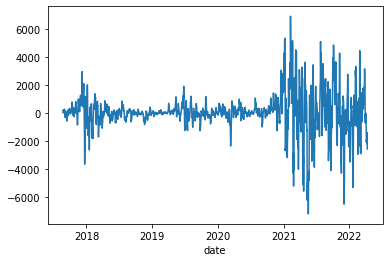

In [ ]:
bc['minus_rolling'].plot()

In [ ]:
X = bc['minus_rolling'][6:]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.771259
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


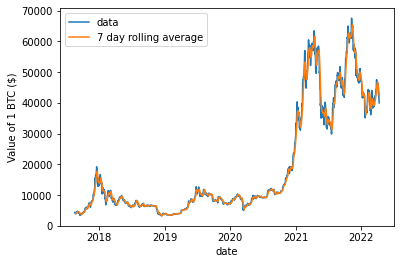

In [ ]:
bc.price.plot(label='data')
bc.rolling_average_7_day.plot(label='7 day rolling average')
plt.ylabel('Value of 1 BTC ($)')
plt.legend()

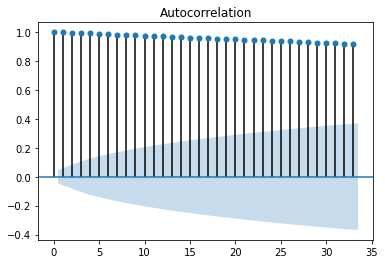

In [ ]:
ax=plot_acf(bc['price'])

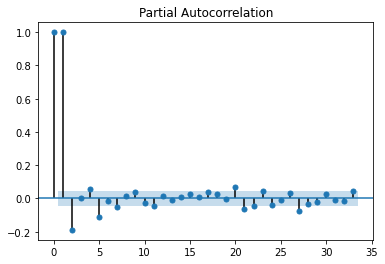

In [ ]:
ax=plot_pacf(bc['price'])

In [ ]:
model=ARIMA(train['price'],order=(2,0,2))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
model_fit

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   31
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -200.088
Date:                Thu, 14 Apr 2022   AIC                            412.176
Time:                        13:12:21   BIC                            420.780
Sample:                    08-17-2017   HQIC                           414.980
                         - 09-16-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4249.4649    116.445     36.493      0.000    4021.237    4477.693
ar.L1          0.7626      0.870      0.876      0.381      -0.943       2.468
ar.L2         -0.2748      0.822     -0.334      0.738      -1.885       1.335
ma.L1          0.4376      0.832      0.526      0.599      -1.194       2.069
ma.L2          0.4757      0.430      1.108      0.268      -0.366       1.318
sigma2      2.219e+04   5524.786      4.017      0.000    1.14e+04     3.3e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.79   Prob(JB):                         0.98
Heteroskedasticity (H):               1.45   Skew:                             0.02
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

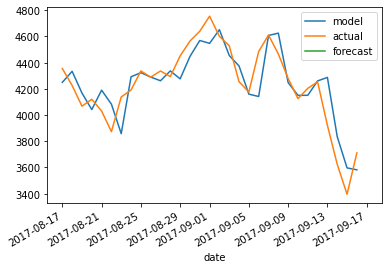

In [ ]:
model_fit.fittedvalues.plot(label='model')
train.price.plot(label='actual')
model_fit.forecast(1).plot(label='forecast')
plt.legend()

In [ ]:
model_fit.forecast(1).values[0]-bc['price'][31]

407.3576132233202

In [ ]:
def fc_days(days):
  train=bc[:bc.index[days]]
  model=ARIMA(train['price'],order=(2,0,1),freq='D')
  model_fit=model.fit()
  forecast=model_fit.forecast(1).values[0]
  return forecast

In [ ]:
def mse(days,forecast):
  mse=(forecast-bc['price'][days+1])**2
  return mse

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
days=[]
forecasts=[]
for i in range(30,len(bc),1):
  days.append(i)
  forecasts.append(fc_days(i))

In [ ]:
len(forecasts)

1670

In [ ]:
len(days)-len(bc)

-30

In [ ]:
days[0]

30

In [ ]:
len(days)

1670

In [ ]:
errors=[]
for i in range(len(forecasts)-1):
  errors.append(mse(days[i],forecasts[i]))

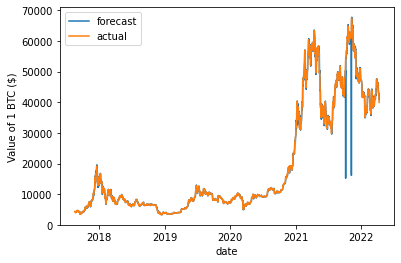

In [ ]:
plt.plot(bc.index[31:],forecasts[:-1],label='forecast')
plt.plot(bc.price,label='actual')
#plt.plot(bc.index[31:],errors,label='errors')
plt.xlabel('date')
plt.ylabel('Value of 1 BTC ($)')
plt.legend()

In [ ]:
len(errors)

1669

Text(0, 0.5, 'Model forecast errors ($^2)')

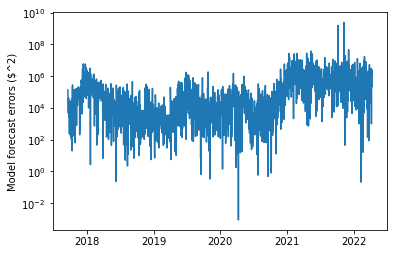

In [ ]:
plt.plot(bc.index[31:],errors,label='errors')
plt.yscale('log')
plt.ylabel('Model forecast errors ($^2)')

Order or magnitude of MSE doesn't change too much with increasing size of training data, increases alot as the size of price increases.

In [ ]:
train=bc[:bc.index[1200]]
model=ARIMA(train['price'],order=(2,0,0),freq='D')
model_fit=model.fit()
forecast=model_fit.forecast(28).values

In [ ]:
forecast

array([18082.99533021, 18064.72763998, 18019.61173585, 17968.87676272,
       17917.13779811, 17865.3972234 , 17813.87185117, 17762.60767944,
       17711.61356901, 17660.89031131, 17610.43694916, 17560.25215113,
       17510.33451043, 17460.6826098 , 17411.29503562, 17362.17038097,
       17313.30724621, 17264.70423914, 17216.35997494, 17168.27307617,
       17120.44217272, 17072.86590177, 17025.54290776, 16978.47184234,
       16931.65136436, 16885.08013977, 16838.75684167, 16792.68015018])

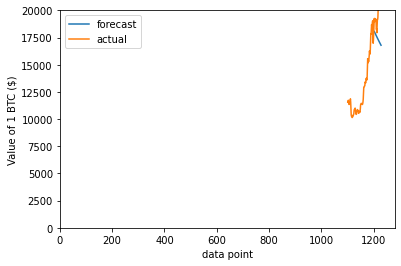

In [ ]:
plt.plot(range(1201,1229,1),forecast,label='forecast')
plt.plot(bc.reset_index(drop=True)[['price']][1101:1241],label='actual')
plt.xlim(0,1280)
plt.ylim(0,20000)
plt.xlabel('data point')
plt.ylabel('Value of 1 BTC ($)')
plt.legend()

In [ ]:
print('price on 12th April: $',bc['price'][-1])
print('forecast price on 12th April: $',forecasts[-2])
print('mean absolute error on 12th April forecast: $',errors[-1]**(1/2))
print('forecasted price for 13th April: $',forecasts[-1])

price on 12th April: $ 39951.993653846155
forecast price on 12th April: $ 40902.55735395539
mean absolute error on 12th April forecast: $ 950.5637001092327
forecasted price for 13th April: $ 39732.629867579875


In [ ]:
model=ARIMA(bc['price'],order=(2,0,1),freq='D')
model_fit=model.fit()
four_weeks=model_fit.forecast(28).values

In [ ]:
four_weeks

array([39732.62986758, 39684.64500265, 39651.58519003, 39619.86523485,
       39588.30544724, 39556.80332636, 39525.34990542, 39493.94433946,
       39462.58648882, 39431.27627522, 39400.01362578, 39368.79846819,
       39337.63073031, 39306.51034011, 39275.43722565, 39244.41131512,
       39213.4325368 , 39182.50081911, 39151.61609055, 39120.77827973,
       39089.98731538, 39059.24312634, 39028.54564155, 38997.89479005,
       38967.29050102, 38936.73270371, 38906.22132749, 38875.75630186])

In [ ]:
extend=pd.date_range(bc.index[-1],periods=29,freq='D')

In [ ]:
extend=extend[1:]

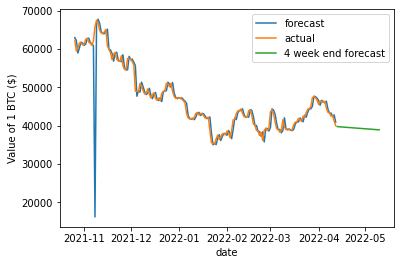

In [ ]:
plt.plot(bc.index[1531:],forecasts[1500:-1],label='forecast')
plt.plot(bc.price[1531:],label='actual')
plt.plot(extend,four_weeks,label='4 week end forecast')
plt.xlabel('date')
plt.ylabel('Value of 1 BTC ($)')
plt.legend()

In [ ]:
for i in range(32,len(bc),1):
  if (bc.reset_index(drop=True).price[i]>bc.reset_index(drop=True).price[i-1])&(forecasts[i-31]>forecasts[i-30]):
    print(i)

33
45
51
58
71
79
96
97
109
117
155
185
195
240
249
254
402
414
480
504
552
553
556
570
581
605
626
636
675
717
719
748
749
801
855
899
951
982
985
1072
1137
1151
1153
1163
1172
1215
1219
1268
1288
1394
1407
1442
1508
1511
1513
1535
1543
1634
1637
1644
1654
1658
1674
1682
1685


In [ ]:
up_index=1072
date=bc.loc[bc.index[up_index],'date']
next_day=bc.loc[bc.index[up_index+1],'date']
up_price=bc.loc[bc.index[up_index],'price']
next_price=bc.loc[bc.index[up_index+1],'price']
forecast1=forecasts[1042]
forecast2=forecasts[1043]

In [ ]:
print('On ',date,', the price of BTC was $',up_price)
print('On ',next_day,', the price of BTC was $',next_price)
print('Our model would have predicted the price to be $',forecast2)
print('That would be a predicted profit of ',100*(forecast2-up_price)/up_price,'%')
print('Instead you would have made a profit of ',100*(next_price-up_price)/up_price,'%')

On  2020-07-24 00:00:00 , the price of BTC was $ 9545.621510416668
On  2020-07-25 00:00:00 , the price of BTC was $ 9609.628125000001
Our model would have predicted the price to be $ 9604.92417433047
That would be a predicted profit of  0.6212551361803773 %
Instead you would have made a profit of  0.6705337574246596 %
